# LendingClub Loan Defaulter Analysis

###### We are analysing consumer finance company which provide analysis for giving various types of loans to the customers. 

##### When the organization get a loan application, the company has to make a decision whether the customers' loan should approve or not.

### For that we need to bifurcate our Analysis into three part
        1. Data understanding
        2. Data cleaning (cleaning missing values and removing unnecessary column and rows)
        3. Data Analysis (univariate non-graphical, multivariate non- graphical, univariate and etc.)
        


In [1]:
#imported all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the loan .csv file to understand the data set

loanData = pd.read_csv("loan.csv", sep= ",")
loanData.shape
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


C:\Users\Nishant\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### 1. Data understanding

In [3]:
# Understand the data set (Row and column)

loanData.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Get all the columns names

list(loanData.columns.values)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

We had identified some of most relevant column i.e. 
##### funded_amnt, grade , term, interest rate, grade, funded_amnt, sub grade, annual_inccome, purpose of the loan etc.

The above rows will help to analysis all type analysis technique. 


#### 2. Data Cleaning


The the loan.csv file we found some of the columns missing values. First we need to clear the missing value and append the meaningful data attribute into rows and coloumns. 

In [5]:
# Fetch all the missing values from each columns
loanData.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# Remove the columns which is having no data (80 % NA)
na_columns = loanData.columns[100*(loanData.isnull().sum()/len(loanData.index)) >= 80]

print("List of columns having 80 % NA values : \n\n", na_columns)

# After cleaning NA attribute, the total number of columns left out

print("\nThe total values columns having NA :", na_columns.isnull().sum())

# Total count of columns left after cleaning

print ("\nTotal count of the unnecessary columns which we need to drop off : ", len(na_columns))


List of columns having 80 % NA values : 

 Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2

In [7]:
# Drop all the columns which have NA values.

loanData = loanData.drop(na_columns, axis=1)
print(loanData.shape)

(39717, 55)


In [8]:
# Percentage of missing value for each columns
100*(loanData.isnull().sum()/len(loanData.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [9]:
# There are two columns which is having more than 50 % of NA data
na_50_percentage_perccolumns = loanData.columns[100*(loanData.isnull().sum()/len(loanData.index)) >= 30]
print ( "The columns having more than 50% Data having NA : \n\n" ,na_50_percentage_perccolumns)
print("\n\n")
print (loanData.desc.head(10) , loanData.mths_since_last_delinq.head(10))



The columns having more than 50% Data having NA : 

 Index(['desc', 'mths_since_last_delinq'], dtype='object')



0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
5                                                  NaN
6      Borrower added on 12/18/11 > I am planning o...
7      Borrower added on 12/16/11 > Downpayment for...
8      Borrower added on 12/21/11 > I own a small h...
9      Borrower added on 12/16/11 > I'm trying to b...
Name: desc, dtype: object 0     NaN
1     NaN
2     NaN
3    35.0
4    38.0
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
Name: mths_since_last_delinq, dtype: float64


- "Desc" column is for borrowers comments like why the borrow took loan for example some of the person took loan for credit building, some of them took loan for buy the car or bike. Hence it is a generic comments which Desc contains, in that case we could above the columns.

- 64 % of "mths_since_last_delinq" attribute has been NA, hence we couldn't get any data for good understanding for analysis. 
  This is not important data for deriving the loan approval. Hence we can ignore this column.


In [10]:
# Drop both the columns (desc,mths_since_last_delinq)
loanData = loanData.drop(na_50_percentage_perccolumns,axis=1)

In [11]:
# Percentage of missing value for each columns
100*(loanData.isnull().sum()/len(loanData.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

- Lets check all the data columns formate

In [12]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [13]:
# Remove the percentage symbol from loan.csv file
loanData['int_rate'] = loanData['int_rate'].str.strip('%').astype(float)
pd.DataFrame(loanData['int_rate']).head()

,int_rate
0,10.65
1,15.27
2,15.96
3,13.49
4,12.69


In [14]:
#Check the data type for int_rate row
loanData.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [15]:
#Drop the missing value from rest of the column
loanData.dropna(how='all', axis=1)
loanData.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

#### 3. Data Analysis

Let remove unnecessary data which we will not use for our analysis.

In [16]:
# Store the unnecessary data into the list 
unnecessary_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type",
  'title','url','zip_code',
   'addr_state']

print(unnecessary_var)

['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'application_type', 'title', 'url', 'zip_code', 'addr_state']


In [17]:
# Drop unnecessary variable from the data set.

df = loanData.drop(unnecessary_var, axis=1)
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [18]:
# Fetch the loan category for each type (Fully Paid, Charged Off , Current)
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

We don't Need current category for data analysis. So we are not replacing Fully Paid to 1 and Charged Off with 0

In [19]:
# filtering only fully paid or charged-off

df = df[df['loan_status'] != 'Current']

# Replace the Full Paid as 1 and Charged of 0
df['loan_status'] = df['loan_status'].apply(lambda y: 0 if y=='Fully Paid' else 1)

# Change the loan status column in interger

df['loan_status'] = df['loan_status'].astype(int)

df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

### - Univariate Analysis

We need to analysis what is average value of defaulter

In [20]:
aveage_of_defaulter = round(np.mean(df['loan_status']), 2)
print(aveage_of_defaulter , "Means of the defaulter")

0.15 Means of the defaulter


###### Let analysis that which of home owner have more defaulter

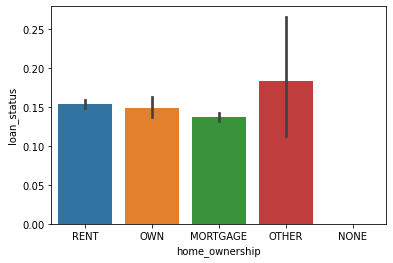

In [21]:
#Ploting the data from home owner and 
sns.barplot(x='home_ownership', y='loan_status', data=df)
plt.show()

In the above bar plot, we could say that the customer who didn't mention the home owner ship having more number of defaulters.

In [22]:
# This is the funcation which help us to plot the bar for all type of attribute
def show_barplot (row_name):
    sns.barplot(x=row_name, y='loan_status', data=df)
    plt.show()

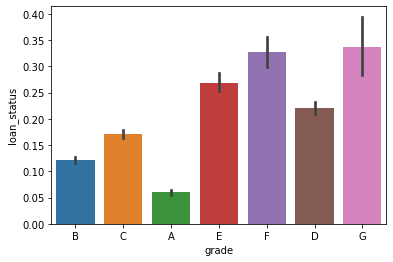

In [23]:
# Grade plot
show_barplot ("grade")

In the above bar plot, we could say the "G" Grade employee have more defaulter and "A" Grade employee get less defaulter

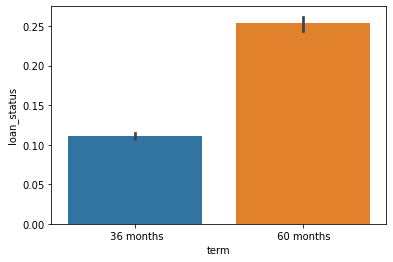

In [24]:
# Plot for term vs loan status
show_barplot('term')

In the above bar plot, we could say more tenure having more defaulter

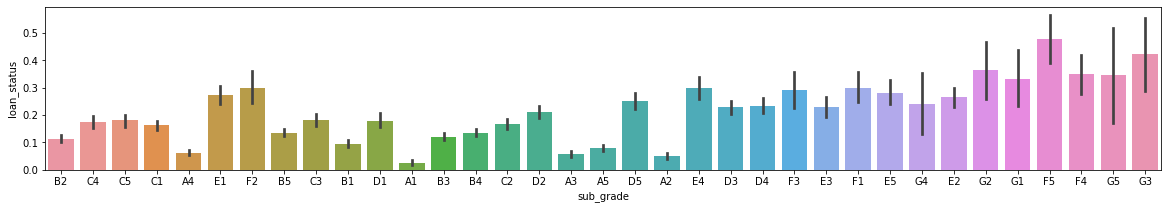

In [25]:
# Plot for sub grade vs loan status
plt.rcParams["figure.figsize"] = (20,3)
show_barplot('sub_grade')



In the above bar plot, we could say the "F5" sub Grade employee have more defaulter and "A1" Grade employee get less defaulter 

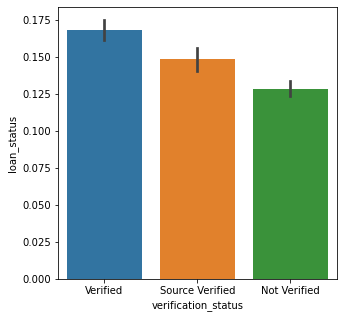

In [26]:
# Plot for verification status vs loan status
plt.rcParams["figure.figsize"] = (5,5)
show_barplot('verification_status')


In the above chart, it is showing that verified profile have more defaulter 

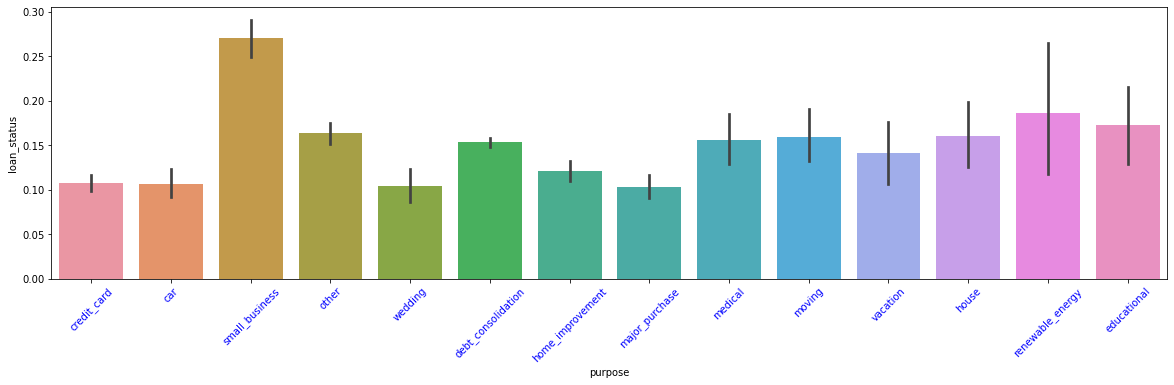

In [27]:
# Plot for purpose via loan staus
plt.rcParams["figure.figsize"] = (20,5)
plt.xticks(rotation=45, c = 'blue')
show_barplot('purpose')

From the above plot, we get to know that "Small business" will have more loan defaulters

In [28]:

df['issue_d'].head()


0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [29]:
df['issue_d'] =  pd.to_datetime(df.issue_d, format='%b-%y')

In [30]:
df['issue_d'].dtypes

dtype('<M8[ns]')

In [31]:
#Fetch date and month
df['year'] = df['issue_d'].dt.year
df['month'] = df['issue_d'].dt.month

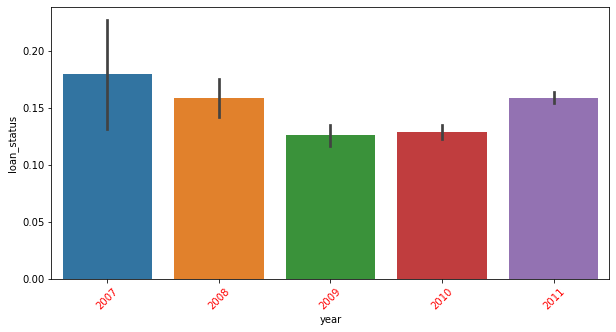

In [32]:
# Plot for  month and loan staus
plt.rcParams["figure.figsize"] = (10,5)
plt.xticks(rotation=45, c = 'Red')
show_barplot('year')

Most of the loan defaulter took the loan in 2007

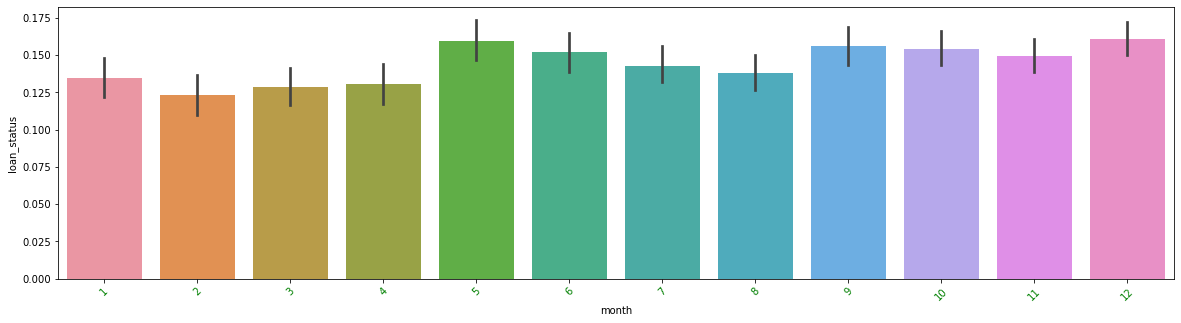

In [33]:
# Plot for  month and loan staus
plt.rcParams["figure.figsize"] = (20,5)
plt.xticks(rotation=45, c = 'Green')
show_barplot('month')

Most of the defaulter took the loan on May month

In [34]:
# Derive the plot from income ratio

def annul_income (an_in):
    if an_in <=50000:
        return 'Under Low CTC'
    elif an_in >=50001 and  an_in <=100000:
        return 'Under Mid CTC'
    else: 
         return 'Under High CTC'




In [35]:
df['annual_inc'] = df['annual_inc'].astype(int)
 
df['annual_inc'] = df['annual_inc'].apply(lambda x: annul_income(x))

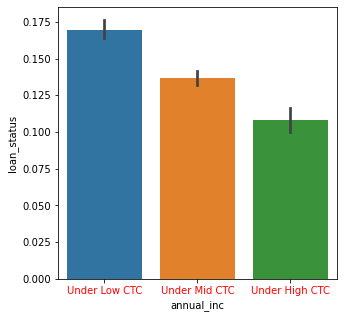

In [36]:
plt.rcParams["figure.figsize"] = (5,5)
plt.xticks(c = 'Red')
show_barplot('annual_inc')

From the above graph, we can observe that the low income employee has been more under the defaulter category.

In [41]:
# Loan funded amount 

def loan_amount (fun_in):
    if fun_in <=5000:
        return 'Low Category'
    elif fun_in >=5001 and  fun_in <=15000:
        return 'Mid Category'
    else: 
         return 'High Category'

In [42]:
df['loan_amnt'] = df['loan_amnt'].astype(int)
 
df['loan_amnt'] = df['loan_amnt'].apply(lambda a: loan_amount(a))

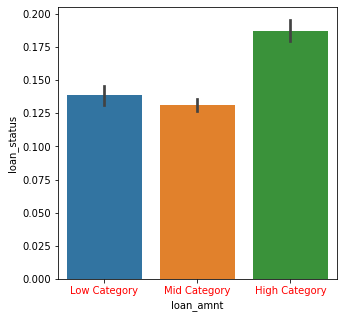

In [43]:
plt.rcParams["figure.figsize"] = (5,5)
plt.xticks(c = 'Red')
show_barplot('loan_amnt')

From the above graph, we can observe that the loan defaulter who took high loan amount

In [44]:
# Loan installment amount 

def installment_amount (ins_amount):
    if ins_amount <=160:
        return 'Low Category'
    elif ins_amount >=161 and  ins_amount <=500:
        return 'Mid Category'
    else: 
         return 'High Category'

In [50]:
df['installment'] = df['installment'].astype(int)
df['installment'] = df['installment'].apply(lambda b: installment_amount(b))

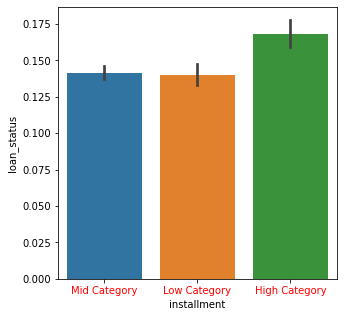

In [51]:
plt.rcParams["figure.figsize"] = (5,5)
plt.xticks(c = 'Red')
show_barplot('installment')

From the above graph, we can observe that the loan defaulter who took high installment amount per month

### - Segmented Univariate Analysis

In segmented univariate analysis, we segment the categorical variables and then conduct univariate analysis across its categories. Let’s see how this simple technique which we used for the analysis.

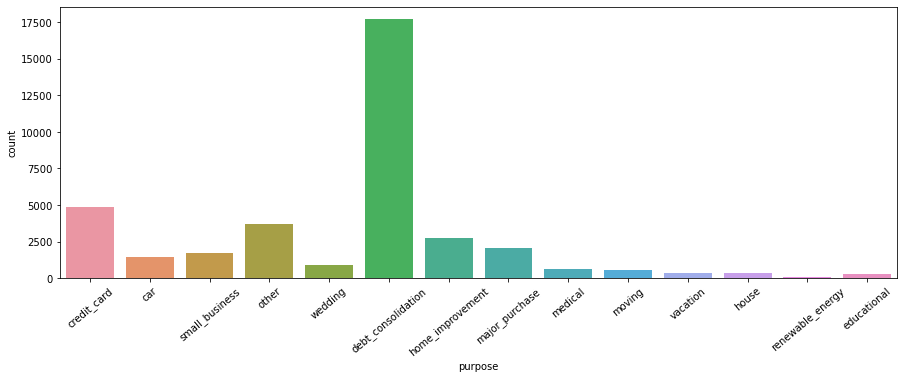

In [71]:
# Analysis purpose of loan like weeding,medica,moving etc.
plt.rcParams["figure.figsize"] = (15,5)
plt.xticks(rotation=40)
sns.countplot(x='purpose', data=df)
plt.show()